# How large does N have to be...
Inspired by Gelman's blog post (https://statmodeling.stat.columbia.edu/2024/05/04/you/), exploring the following question: How large does N have to be for you to have a good chance of distinguishing a 30% shooter from a 40% shooter? Also using this as an excuse to experiment with Chat-GPT's aid.

Many ways of interpreting the question, will start with some eye tests, first with some fair coins.

## Exploratory Analysis of Fair Coins

Let's say we have 2 fair coins and we flip them a bunch of times, how often will they "look" different?

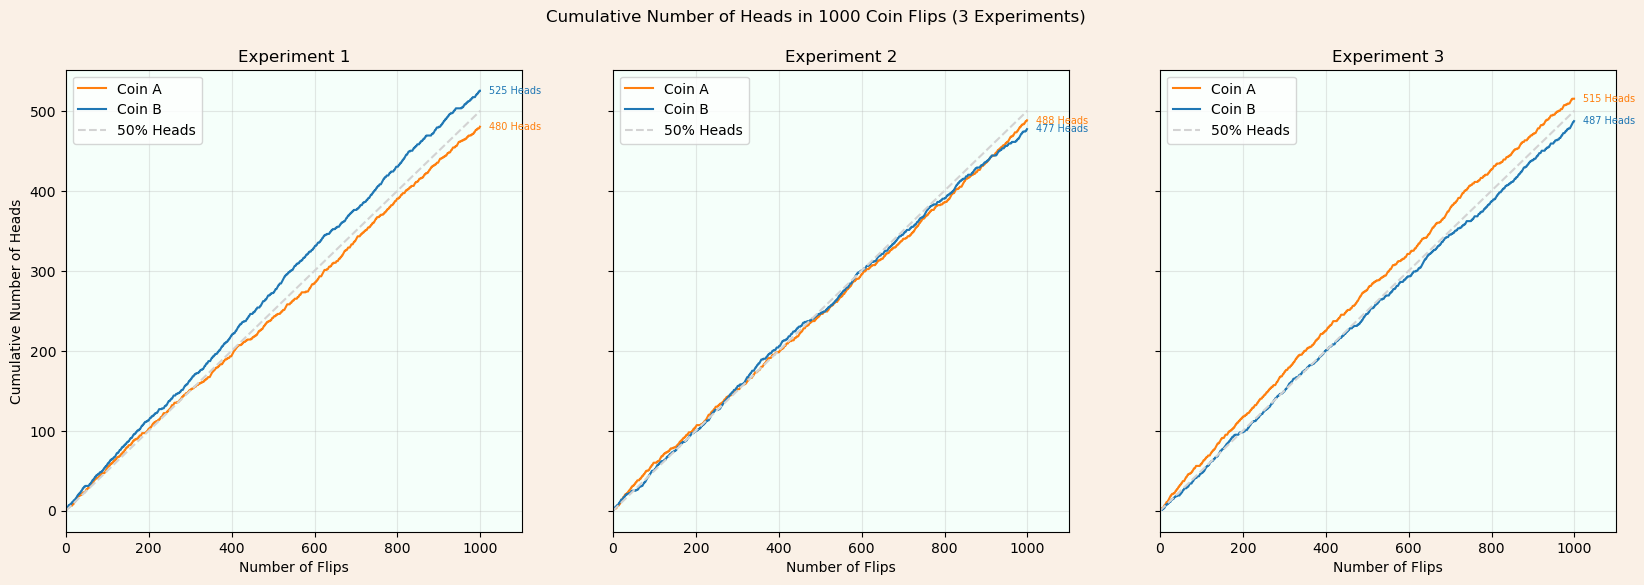

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Function to simulate coin flips and get cumulative heads
def simulate_cumulative_coin_flips(num_flips, p=0.5):
    flips = np.random.binomial(1, p, num_flips)
    cumulative_heads = np.cumsum(flips)
    return cumulative_heads


# Function to perform the experiment
def perform_experiment(num_experiments, num_flips):
    cumulative_results_A = []
    cumulative_results_B = []

    for _ in range(num_experiments):
        cumulative_heads_A = simulate_cumulative_coin_flips(num_flips)
        cumulative_heads_B = simulate_cumulative_coin_flips(num_flips)

        cumulative_results_A.append(cumulative_heads_A)
        cumulative_results_B.append(cumulative_heads_B)

    return cumulative_results_A, cumulative_results_B


# Main function
def main():
    num_experiments = 3  # Number of experiments to display
    num_flips = 1000

    cumulative_results_A, cumulative_results_B = perform_experiment(num_experiments, num_flips)

    # Create figure and set the background color
    fig, axs = plt.subplots(1, num_experiments, figsize=(20, 6), sharey=True)
    fig.patch.set_facecolor('linen')

    for i in range(num_experiments):
        ax = axs[i]
        ax.set_facecolor('mintcream')

        # Plot the cumulative number of heads for both coins
        ax.plot(cumulative_results_A[i], label='Coin A', color='tab:orange')
        ax.plot(cumulative_results_B[i], label='Coin B', color='tab:blue')

        # Add a light grey dotted line representing 50% heads
        ax.plot(range(num_flips + 1), [x * 0.5 for x in range(num_flips + 1)], linestyle='--', color='lightgrey',
                label='50% Heads')

        # Annotate the final number of heads for each coin
        final_heads_A = cumulative_results_A[i][-1]
        final_heads_B = cumulative_results_B[i][-1]

        ax.annotate(f'{final_heads_A} Heads', xy=(num_flips, final_heads_A), xytext=(num_flips + 20, final_heads_A),
                    color='tab:orange', fontsize=7,
                    verticalalignment='center')

        ax.annotate(f'{final_heads_B} Heads', xy=(num_flips, final_heads_B), xytext=(num_flips + 20, final_heads_B),
                    color='tab:blue', fontsize=7,
                    verticalalignment='center')

        ax.set_xlabel('Number of Flips')
        if i == 0:
            ax.set_ylabel('Cumulative Number of Heads')
        ax.set_title(f'Experiment {i + 1}')
        ax.legend(loc='upper left')
        ax.grid(True, alpha=0.3)  # Set the gridlines to be more transparent
        ax.set_xlim(0, num_flips + 100)  # Extend x-axis to accommodate labels

    plt.suptitle('Cumulative Number of Heads in 1000 Coin Flips (3 Experiments)')
    plt.show()


if __name__ == "__main__":
    main()


Here's another way of looking at it: the running percentage of heads up to 500 flips. I have included an annotation of the point AFTER 100 flips which is the maximum difference observed between two fair coins flipping.

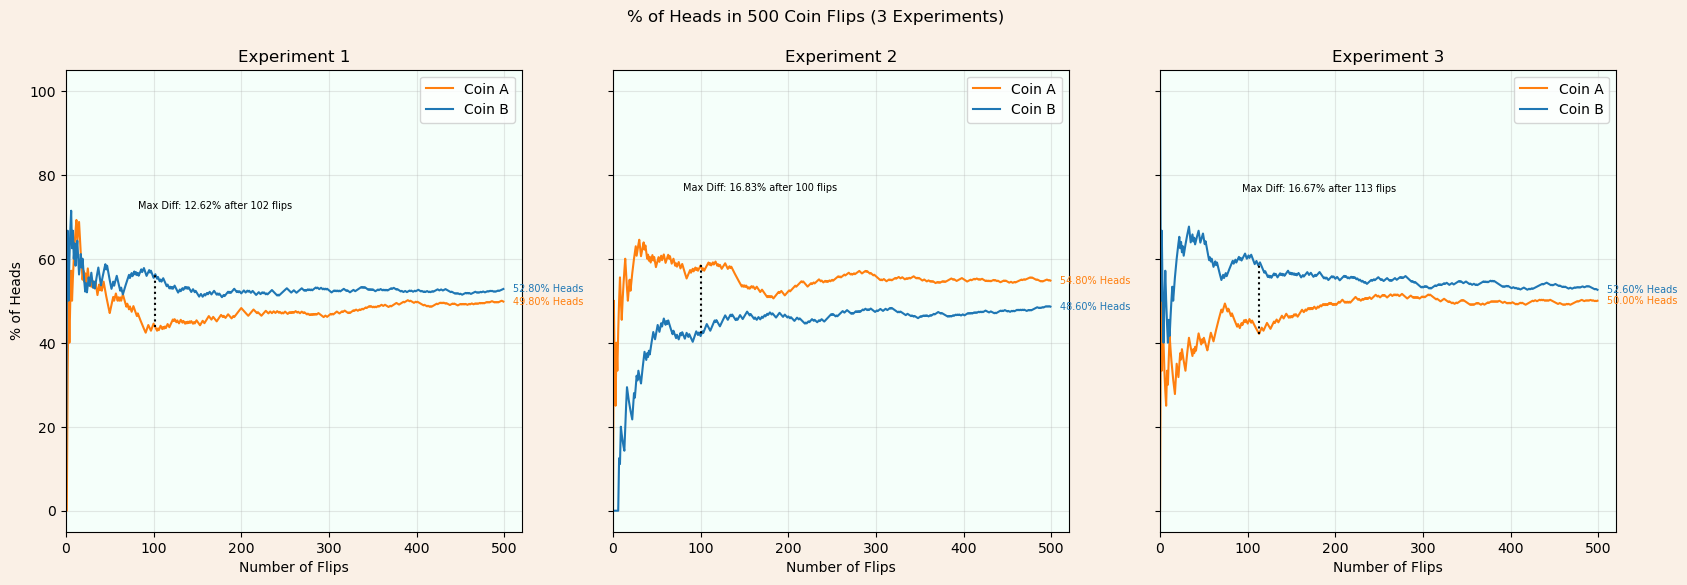

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Function to simulate coin flips and get cumulative heads
def simulate_cumulative_coin_flips(num_flips, p=0.5):
    flips = np.random.binomial(1, p, num_flips)
    cumulative_heads = np.cumsum(flips)
    return cumulative_heads


# Function to perform the experiment
def perform_experiment(num_experiments, num_flips):
    cumulative_results_A = []
    cumulative_results_B = []

    for _ in range(num_experiments):
        cumulative_heads_A = simulate_cumulative_coin_flips(num_flips)
        cumulative_heads_B = simulate_cumulative_coin_flips(num_flips)

        cumulative_results_A.append(cumulative_heads_A)
        cumulative_results_B.append(cumulative_heads_B)

    return cumulative_results_A, cumulative_results_B


# Main function
def main():
    num_experiments = 3  # Number of experiments to display
    num_flips = 500

    cumulative_results_A, cumulative_results_B = perform_experiment(num_experiments, num_flips)

    # Create figure and set the background color
    fig, axs = plt.subplots(1, num_experiments, figsize=(20, 6), sharey=True)
    fig.patch.set_facecolor('linen')

    max_diff_x = []
    max_diff_value = []

    for i in range(num_experiments):
        ax = axs[i]
        ax.set_facecolor('mintcream')

        # Calculate the percentage of heads for both coins
        pct_heads_A = cumulative_results_A[i] / (np.arange(num_flips) + 1) * 100
        pct_heads_B = cumulative_results_B[i] / (np.arange(num_flips) + 1) * 100

        # Plot the percentage of heads for both coins
        ax.plot(pct_heads_A, label='Coin A', color='tab:orange')
        ax.plot(pct_heads_B, label='Coin B', color='tab:blue')

        # Add a light grey dotted line representing 50% heads
        #ax.axhline(y=50, color='lightgrey', linestyle='--', label='50% Heads')

        # Annotate the final percentage of heads for each coin
        final_pct_heads_A = pct_heads_A[-1]
        final_pct_heads_B = pct_heads_B[-1]

        ax.annotate(f'{final_pct_heads_A:.2f}% Heads', xy=(num_flips - 1, final_pct_heads_A),
                    xytext=(num_flips + 10, final_pct_heads_A),
                    color='tab:orange', fontsize=7, verticalalignment='center')

        ax.annotate(f'{final_pct_heads_B:.2f}% Heads', xy=(num_flips - 1, final_pct_heads_B),
                    xytext=(num_flips + 10, final_pct_heads_B),
                    color='tab:blue', fontsize=7, verticalalignment='center')

        # Calculate differences in percentage of heads starting after 100 flips
        diff_pct_heads = np.abs(pct_heads_A - pct_heads_B)

        # Find the index where the difference in percentage of heads is maximum starting after 100 flips
        max_diff_idx = 100 + np.argmax(diff_pct_heads[100:])  # Start after 100 flips
        max_diff_x.append(max_diff_idx)
        max_diff_value.append(diff_pct_heads[max_diff_idx])

        # Add annotation for max difference in percentage of heads starting after 100 flips
        ax.annotate(f'Max Diff: {diff_pct_heads[max_diff_idx]:.2f}% after {max_diff_idx} flips',
                    xy=(max_diff_idx, max_diff_value[-1]),
                    xytext=(max_diff_idx + 10 - 30, max_diff_value[-1] + 60), color='black', fontsize=7,
                    verticalalignment='center')

        # Get the y-values for Coin A and Coin B at max_diff_idx
        y_value_A = pct_heads_A[max_diff_idx]
        y_value_B = pct_heads_B[max_diff_idx]

        # Add a dotted black vertical line between the lines for Coin A and Coin B at max_diff_idx
        ax.plot([max_diff_idx, max_diff_idx], [y_value_A, y_value_B], color='black', linestyle=':')

        ax.set_xlabel('Number of Flips')
        if i == 0:
            ax.set_ylabel('% of Heads')
        ax.set_title(f'Experiment {i + 1}')
        ax.legend(loc='upper right')
        ax.grid(True, alpha=0.3)  # Set the gridlines to be more transparent
        ax.set_xlim(0, num_flips + 20)  # Extend x-axis to accommodate labels

    plt.suptitle('% of Heads in 500 Coin Flips (3 Experiments)')
    plt.show()

if __name__ == "__main__":
    main()


By quick eye it looks like it stabilizes around 150, but not always. In my first run of 3 experiments, there was a difference of ~12% after 150 flips between the two coins. 

## Exploratory Analysis of Different Shooters

Here is the same viz for a 30% vs 40% Shooter, but with the minimum difference shown (how close could the two look after n shots where n is at least 100)

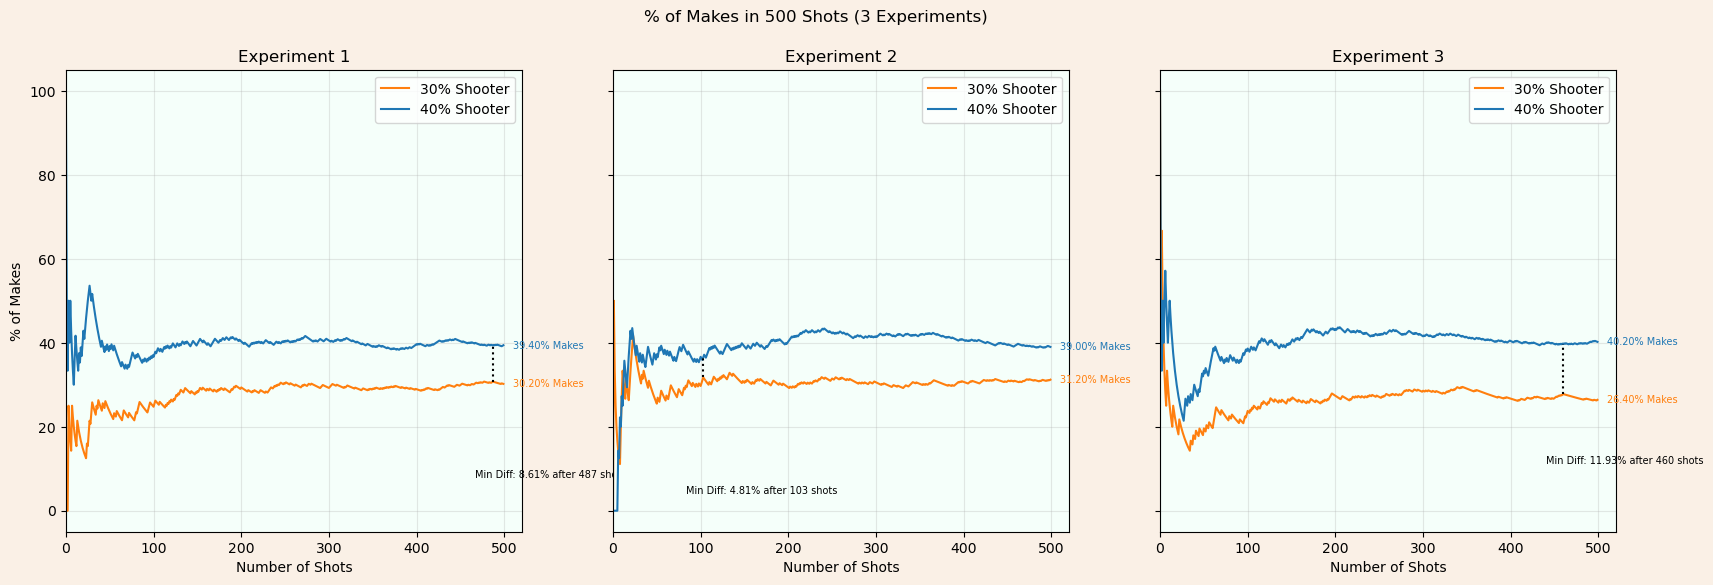

In [11]:
import numpy as np
import matplotlib.pyplot as plt


# Function to simulate coin flips and get cumulative heads
def simulate_cumulative_coin_flips(num_flips, p=0.5):
    flips = np.random.binomial(1, p, num_flips)
    cumulative_heads = np.cumsum(flips)
    return cumulative_heads


# Function to perform the experiment
def perform_experiment(num_experiments, num_flips):
    cumulative_results_A = []
    cumulative_results_B = []

    for _ in range(num_experiments):
        shooter_30 = simulate_cumulative_coin_flips(num_flips, p=.3)
        shooter_40 = simulate_cumulative_coin_flips(num_flips, p=.4)

        cumulative_results_A.append(shooter_30)
        cumulative_results_B.append(shooter_40)

    return cumulative_results_A, cumulative_results_B


# Main function
def main():
    num_experiments = 3  # Number of experiments to display
    num_flips = 500

    cumulative_results_A, cumulative_results_B = perform_experiment(num_experiments, num_flips)

    # Create figure and set the background color
    fig, axs = plt.subplots(1, num_experiments, figsize=(20, 6), sharey=True)
    fig.patch.set_facecolor('linen')

    max_diff_x = []
    max_diff_value = []

    for i in range(num_experiments):
        ax = axs[i]
        ax.set_facecolor('mintcream')

        # Calculate the percentage of heads for both coins
        pct_heads_A = cumulative_results_A[i] / (np.arange(num_flips) + 1) * 100
        pct_heads_B = cumulative_results_B[i] / (np.arange(num_flips) + 1) * 100

        # Plot the percentage of heads for both coins
        ax.plot(pct_heads_A, label='30% Shooter', color='tab:orange')
        ax.plot(pct_heads_B, label='40% Shooter', color='tab:blue')

        # Add a light grey dotted line representing 50% heads
        #ax.axhline(y=50, color='lightgrey', linestyle='--', label='50% Heads')

        # Annotate the final percentage of heads for each coin
        final_pct_heads_A = pct_heads_A[-1]
        final_pct_heads_B = pct_heads_B[-1]

        ax.annotate(f'{final_pct_heads_A:.2f}% Makes', xy=(num_flips - 1, final_pct_heads_A),
                    xytext=(num_flips + 10, final_pct_heads_A),
                    color='tab:orange', fontsize=7, verticalalignment='center')

        ax.annotate(f'{final_pct_heads_B:.2f}% Makes', xy=(num_flips - 1, final_pct_heads_B),
                    xytext=(num_flips + 10, final_pct_heads_B),
                    color='tab:blue', fontsize=7, verticalalignment='center')

        # Calculate differences in percentage of heads starting after 100 flips
        diff_pct_heads = np.abs(pct_heads_A - pct_heads_B)

        # Find the index where the difference in percentage of heads is maximum starting after 100 flips
        max_diff_idx = 100 + np.argmin(diff_pct_heads[100:])  # Start after 100 flips
        max_diff_x.append(max_diff_idx)
        max_diff_value.append(diff_pct_heads[max_diff_idx])

        # Add annotation for max difference in percentage of heads starting after 100 flips
        ax.annotate(f'Min Diff: {diff_pct_heads[max_diff_idx]:.2f}% after {max_diff_idx} shots',
                    xy=(max_diff_idx, max_diff_value[-1]),
                    xytext=(max_diff_idx + 10 - 30, max_diff_value[-1]), color='black', fontsize=7,
                    verticalalignment='center')

        # Get the y-values for Coin A and Coin B at max_diff_idx
        y_value_A = pct_heads_A[max_diff_idx]
        y_value_B = pct_heads_B[max_diff_idx]

        # Add a dotted black vertical line between the lines for Coin A and Coin B at max_diff_idx
        ax.plot([max_diff_idx, max_diff_idx], [y_value_A, y_value_B], color='black', linestyle=':')

        ax.set_xlabel('Number of Shots')
        if i == 0:
            ax.set_ylabel('% of Makes')
        ax.set_title(f'Experiment {i + 1}')
        ax.legend(loc='upper right')
        ax.grid(True, alpha=0.3)  # Set the gridlines to be more transparent
        ax.set_xlim(0, num_flips + 20)  # Extend x-axis to accommodate labels

    plt.suptitle('% of Makes in 500 Shots (3 Experiments)')
    plt.show()

if __name__ == "__main__":
    main()


By eye with a few experiments, it looks like it would reasonably take ~150 shots for the 40% shooter to be at least a few % points better than the 30%. I will know look at some more involved simulation-based tests as well as power analyses.

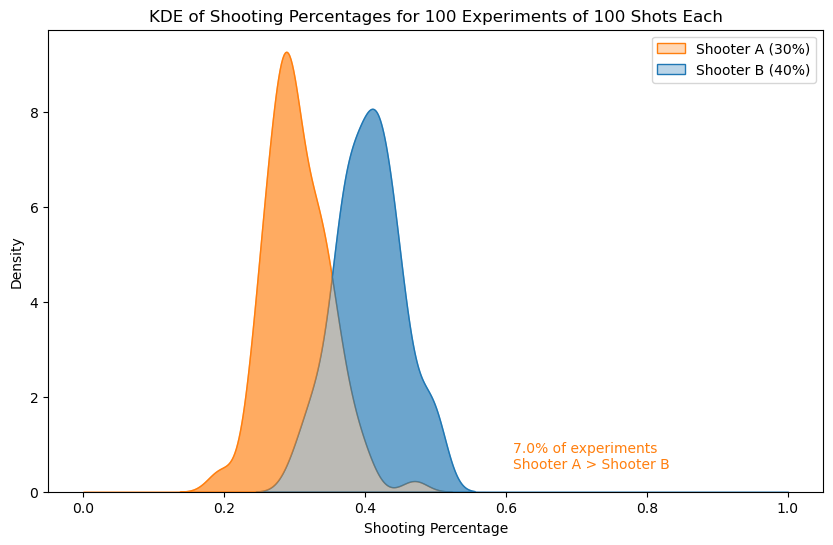

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Function to simulate shooting attempts
def simulate_shooting(p, num_shots):
    return np.random.binomial(1, p, num_shots)

# Function to perform experiments and collect shooting percentages
def perform_experiments(num_experiments, num_shots, p):
    results = []
    for _ in range(num_experiments):
        shots = simulate_shooting(p, num_shots)
        shooting_percentage = np.mean(shots)
        results.append(shooting_percentage)
    return results

# Parameters
num_experiments = 100
num_shots = 100
p_shooter_A = 0.30
p_shooter_B = 0.40

# Perform experiments for both shooters
results_A = perform_experiments(num_experiments, num_shots, p_shooter_A)
results_B = perform_experiments(num_experiments, num_shots, p_shooter_B)

# Calculate the percentage of experiments where Shooter A made more shots than Shooter B
count_A_better = sum(np.array(results_A) > np.array(results_B))
percentage_A_better = (count_A_better / num_experiments) * 100

# Generate KDEs
kde_A = gaussian_kde(results_A, bw_method='scott')
kde_B = gaussian_kde(results_B, bw_method='scott')

# Define range for plotting
x = np.linspace(0, 1, 1000)
kde_A_values = kde_A(x)
kde_B_values = kde_B(x)

# Plot KDEs
plt.figure(figsize=(10, 6))
sns.kdeplot(results_A, label='Shooter A (30%)', color='tab:orange', fill=True, alpha=0.3)
sns.kdeplot(results_B, label='Shooter B (40%)', color='tab:blue', fill=True, alpha=0.3)

# Shade regions where Shooter A's KDE is above Shooter B's KDE
plt.fill_between(x, kde_A_values, kde_B_values, where=(kde_A_values > kde_B_values), 
                 interpolate=True, color='tab:orange', alpha=0.5)

# Shade regions where Shooter B's KDE is above Shooter A's KDE
plt.fill_between(x, kde_A_values, kde_B_values, where=(kde_A_values < kde_B_values), 
                 interpolate=True, color='tab:blue', alpha=0.5)

# Add annotation for the percentage of experiments where Shooter A made more shots
plt.annotate(f'{percentage_A_better:.1f}% of experiments\nShooter A > Shooter B',
             xy=(0.6, 0.05), xycoords='axes fraction', fontsize=10, color='tab:orange')

plt.xlabel('Shooting Percentage')
plt.ylabel('Density')
plt.title('KDE of Shooting Percentages for 100 Experiments of 100 Shots Each')
plt.legend()
plt.show()


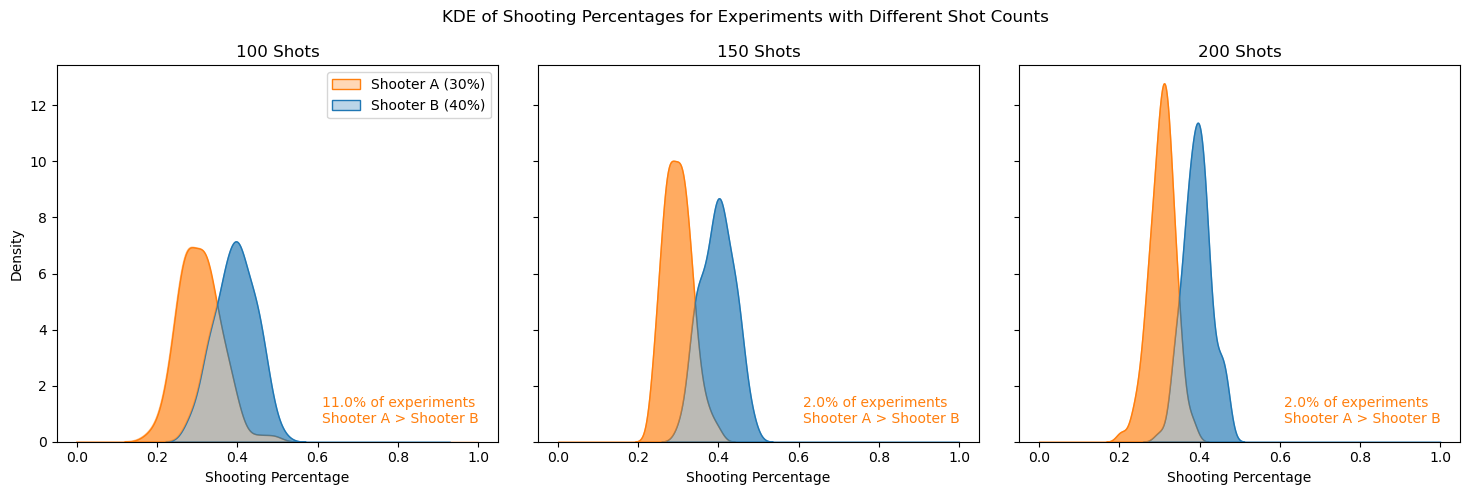

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Function to simulate shooting attempts
def simulate_shooting(p, num_shots):
    return np.random.binomial(1, p, num_shots)

# Function to perform experiments and collect shooting percentages
def perform_experiments(num_experiments, num_shots, p):
    results = []
    for _ in range(num_experiments):
        shots = simulate_shooting(p, num_shots)
        shooting_percentage = np.mean(shots)
        results.append(shooting_percentage)
    return results

# Parameters
num_experiments = 100
shot_counts = [100, 150, 200]
p_shooter_A = 0.30
p_shooter_B = 0.40

# Initialize subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, num_shots in enumerate(shot_counts):
    # Perform experiments for both shooters
    results_A = perform_experiments(num_experiments, num_shots, p_shooter_A)
    results_B = perform_experiments(num_experiments, num_shots, p_shooter_B)

    # Calculate the percentage of experiments where Shooter A made more shots than Shooter B
    count_A_better = sum(np.array(results_A) > np.array(results_B))
    percentage_A_better = (count_A_better / num_experiments) * 100

    # Generate KDEs
    kde_A = gaussian_kde(results_A, bw_method='scott')
    kde_B = gaussian_kde(results_B, bw_method='scott')

    # Define range for plotting
    x = np.linspace(0, 1, 1000)
    kde_A_values = kde_A(x)
    kde_B_values = kde_B(x)

    # Plot KDEs
    ax = axs[i]
    ax.set_title(f'{num_shots} Shots')
    sns.kdeplot(results_A, ax=ax, label='Shooter A (30%)', color='tab:orange', fill=True, alpha=0.3)
    sns.kdeplot(results_B, ax=ax, label='Shooter B (40%)', color='tab:blue', fill=True, alpha=0.3)

    # Shade regions where Shooter A's KDE is above Shooter B's KDE
    ax.fill_between(x, kde_A_values, kde_B_values, where=(kde_A_values > kde_B_values), 
                    interpolate=True, color='tab:orange', alpha=0.5)

    # Shade regions where Shooter B's KDE is above Shooter A's KDE
    ax.fill_between(x, kde_A_values, kde_B_values, where=(kde_A_values < kde_B_values), 
                    interpolate=True, color='tab:blue', alpha=0.5)

    # Add annotation for the percentage of experiments where Shooter A made more shots
    ax.annotate(f'{percentage_A_better:.1f}% of experiments\nShooter A > Shooter B',
                xy=(0.6, 0.05), xycoords='axes fraction', fontsize=10, color='tab:orange')

    ax.set_xlabel('Shooting Percentage')
    ax.set_ylabel('Density')

    if i == 0:
        ax.legend()

plt.suptitle('KDE of Shooting Percentages for Experiments with Different Shot Counts')
plt.tight_layout()
plt.show()


This visualization is really not the way to see much of anything. Next, I will show a series of experiments describing how often Shooter B makes more than Shooter A in 100 experiments of variable n shots.

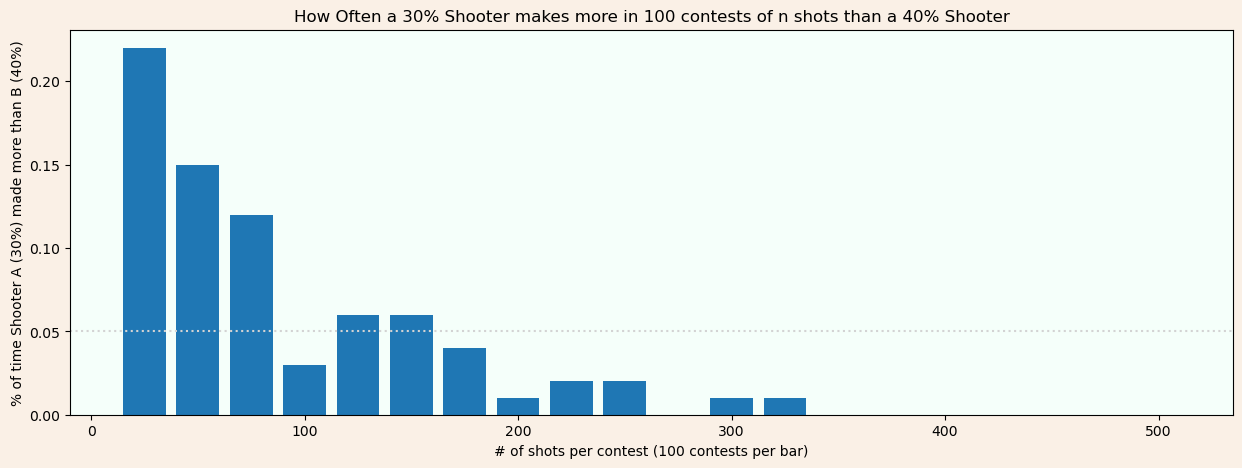

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate a single player's shots
def simulate_single_shooter(p, num_shots):
    return np.mean(np.random.binomial(1, p, num_shots))

# Function to simulate a shooting contest between 2 players and return how often shooter A made the same or more
def simulate_shooting_contest(num_trials, num_shots):
    results = []
    for trial in range(num_trials):
        shooter_A_results = simulate_single_shooter(.3, num_shots)
        shooter_B_results = simulate_single_shooter(.4, num_shots)

        if shooter_B_results > shooter_A_results:
            winner = 0
        elif shooter_A_results >= shooter_B_results:
            winner = 1

        results.append(winner)
    return results

# Running the shooting contest 100 types per variable number of shots within a range, putting results into a dict
contest_results = {}
for shots in list(range(25, 525, 25)):
    num_trials = 100
    contest_results[shots] = np.mean(simulate_shooting_contest(num_trials, shots))


# Plotting the results
fig, ax = plt.subplots(facecolor=('linen'), figsize = (15,5))
plt.bar(contest_results.keys(), contest_results.values(), width=20, color="tab:blue")
plt.axhline(y=.05, color='lightgrey', linestyle=':')

ax.set_facecolor('mintcream')
plt.xlabel('# of shots per contest (100 contests per bar)')
plt.ylabel('% of time Shooter A (30%) made more than B (40%)')
plt.title('How Often a 30% Shooter makes more in 100 contests of n shots than a 40% Shooter')
plt.show()


Again, by eye, it looks to be ~150

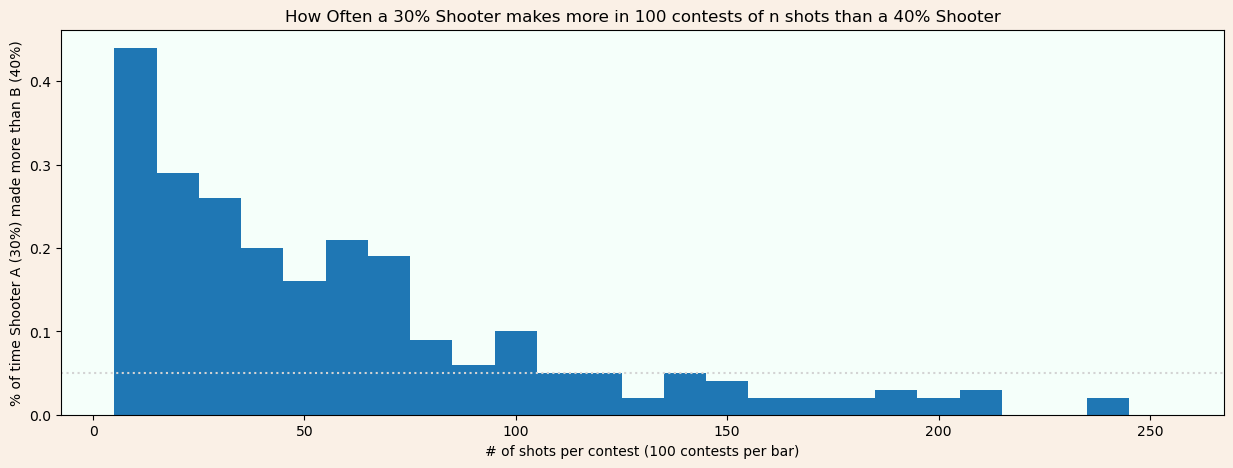

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate a single player's shots
def simulate_single_shooter(p, num_shots):
    return np.mean(np.random.binomial(1, p, num_shots))

# Function to simulate a shooting contest between 2 players and return how often shooter A made the same or more
def simulate_shooting_contest(num_trials, num_shots):
    results = []
    for trial in range(num_trials):
        shooter_A_results = simulate_single_shooter(.3, num_shots)
        shooter_B_results = simulate_single_shooter(.4, num_shots)

        if shooter_B_results > shooter_A_results:
            winner = 0
        elif shooter_A_results >= shooter_B_results:
            winner = 1

        results.append(winner)
    return results

# Running the shooting contest 100 types per variable number of shots within a range, putting results into a dict
contest_results = {}
for shots in list(range(10, 260, 10)):
    num_trials = 100
    contest_results[shots] = np.mean(simulate_shooting_contest(num_trials, shots))


# Plotting the results
fig, ax = plt.subplots(facecolor=('linen'), figsize = (15,5))
plt.bar(contest_results.keys(), contest_results.values(), width=10, color="tab:blue")
plt.axhline(y=.05, color='lightgrey', linestyle=':')

ax.set_facecolor('mintcream')
plt.xlabel('# of shots per contest (100 contests per bar)')
plt.ylabel('% of time Shooter A (30%) made more than B (40%)')
plt.title('How Often a 30% Shooter makes more in 100 contests of n shots than a 40% Shooter')
plt.show()



Again I would say ~130-150

## Power Analysis

The power of the test is the probability that the test will find a statistically significant difference between the two shooters, as a function of the size of the true difference between them. Power Analysis can be used to calculate the minimum sample size required so that one can be reasonably likely to detect an effect of a given size.

In [29]:
"""This is the python code translated from the R code on Gelman's website using power analysis"""

import numpy as np
from scipy.stats import norm

# Parameters
p1 = 0.3
p2 = 0.4
alpha = 0.05
power = 0.8  # Typically power is set to 0.8 (80%)

# Calculations
est = abs(p1 - p2)
z_alpha = norm.ppf(1 - alpha / 2)
z_beta = norm.ppf(power)

# Required sample size calculation
n = ((z_alpha + z_beta) ** 2) * ((p1 * (1 - p1)) + (p2 * (1 - p2))) / (est ** 2)

print(f"The required sample size is approximately: {int(np.ceil(n))}")

The required sample size is approximately: 354
